<a href="https://colab.research.google.com/github/YonDraco/learn-deep-learning/blob/main/demo10_RegressionUsingFullyConnectedNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the bike sharing dataset
<b>Download link:</b> https://www.kaggle.com/marklvl/bike-sharing-dataset


In [ ]:
!pip install graphviz

In [ ]:
!pip install hiddenlayer

In [ ]:
import torch
import hiddenlayer as hl

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [ ]:
data = pd.read_csv('./datasets/bike_sharing.csv', index_col=0)                        

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.shape

(731, 16)

#### Visualizing relationships

- We see that for both the years fall is the most popular season for bike rentals.
- The Bike rentals seem to have increased in one year

Text(0.5, 1.0, 'Number of bikes rented per season')

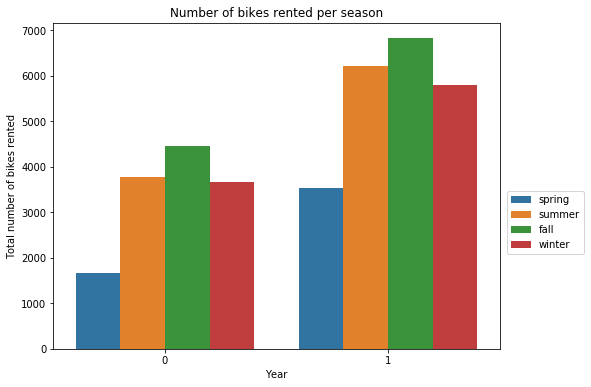

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot('yr', 'cnt', hue = 'season', data = data, ci=None)

plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,0.5))

plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')

plt.title('Number of bikes rented per season')

- workingday: If day is neither weekend nor holiday is 1, otherwise is 0
- we see that when it is not a working day more bikes are rented for all months

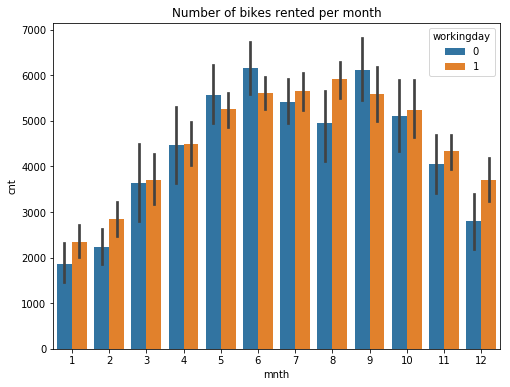

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = data)

plt.title('Number of bikes rented per month')
plt.show()

 number of bikes rented are higher for high temperature

Text(0, 0.5, 'Total number of bikes rented')

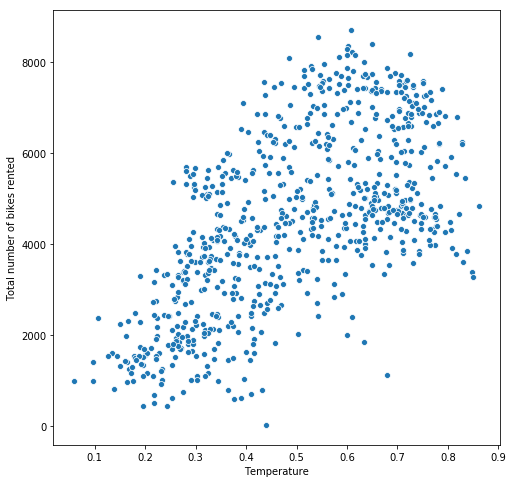

In [ ]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x = 'temp', y = 'cnt', data = data)

plt.xlabel('Temperature')
plt.ylabel('Total number of bikes rented')

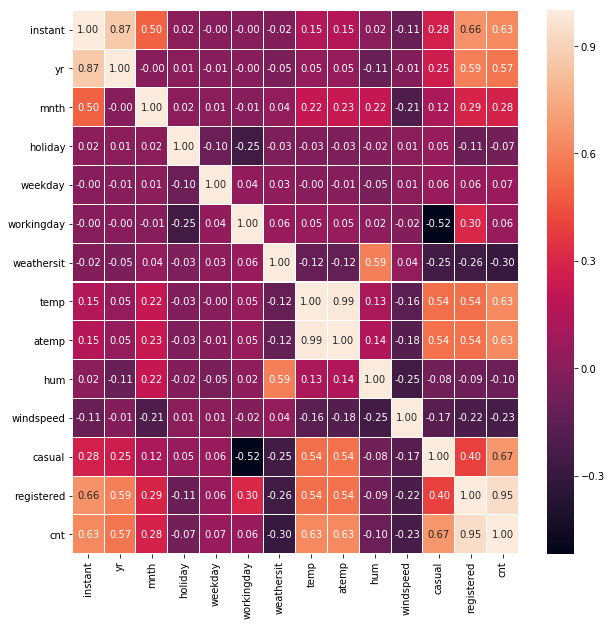

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f')

plt.show()

#### we perform one-hot encoding on categorical column season 

In [ ]:
data = pd.get_dummies(data, columns= ['season'])

data.sample(5)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,season_winter
658,659,2012-10-20,1,10,0,6,0,1,0.484167,0.472842,0.572917,0.117537,2806,5284,8090,0,0,0,1
329,330,2011-11-26,0,11,0,6,0,1,0.375833,0.385087,0.681667,0.068421,1249,1819,3068,0,0,0,1
544,545,2012-06-28,1,6,0,4,1,1,0.749167,0.675512,0.422500,0.171650,921,5958,6879,1,0,0,0
195,196,2011-07-15,0,7,0,5,1,1,0.663333,0.624371,0.591250,0.182833,1318,4220,5538,1,0,0,0
276,277,2011-10-04,0,10,0,2,1,1,0.484167,0.472858,0.710000,0.205854,486,3970,4456,0,0,0,1


#### we choose the following features to perform regression

In [ ]:
columns = ['registered', 'holiday', 'weekday', 
           'weathersit', 'temp', 'atemp',
           'season_fall', 'season_spring', 
           'season_summer', 'season_winter']


features = data[columns]

In [ ]:
features.head()

,registered,holiday,weekday,weathersit,temp,atemp,season_fall,season_spring,season_summer,season_winter
0,654,0,6,2,0.344167,0.363625,0,1,0,0
1,670,0,0,2,0.363478,0.353739,0,1,0,0
2,1229,0,1,1,0.196364,0.189405,0,1,0,0
3,1454,0,2,1,0.200000,0.212122,0,1,0,0
4,1518,0,3,1,0.226957,0.229270,0,1,0,0


#### count is our target variable

In [ ]:
target = data[['cnt']]

In [ ]:
target.head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


#### Create training and test data using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

#### Split the data into two chunks - 80% for training and 20% for testing 


In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

#### Converting data in pytorch tensors

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [ ]:
X_train_tensor.shape

torch.Size([584, 10])

In [ ]:
Y_train_tensor.shape

torch.Size([584, 1])

In [ ]:
import torch.utils.data as data_utils 

torch.utils.data.TensorDataset(*tensors) - Dataset wrapping tensors.Each sample will be retrieved by indexing tensors along the first dimension.

In [ ]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

torch.utils.data.DataLoader -  Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset.

torch.utils.data.DataLoader provides

- Batching the data
- Shuffling the data
- Load the data in parallel using multiprocessing workers

In [ ]:
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [ ]:
len(train_loader)

6

In [ ]:
features_batch, target_batch = iter(train_loader).next()

In [ ]:
features_batch.shape

torch.Size([100, 10])

In [ ]:
target_batch.shape

torch.Size([100, 1])

#### Define the parameters for the neural network
* <b>inp</b> sets the input size  matching the shape of the X_train_tensor. 
* <b>out</b> will be used to set the size of the output from the neural network. We only predict a single output for each day, so this will be 1
* <b>hid</b> is used to set the number of hidden neurons in our neural network
* <b>loss_fn</b> is MSELoss since we're performing a linear regression

In [ ]:
inp = X_train_tensor.shape[1]
out = 1

hid = 10

loss_fn = torch.nn.MSELoss()

<b>nn.Sequential:</b>
Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

<b>nn.Linear: </b> Applies a linear transformation to the incoming data: y=Ax+b<br>
parameters:<br>
in_features – size of each input sample
out_features – size of each output sample
bias – If set to False, the layer will not learn an additive bias. Default: True

<b>Sigmoid : </b>Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))


<b>Dropout : </b>During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. Each channel will be zeroed out independently on every forward call.

#### Creating model using nn.Sequential(..)

Steps:
- first run only with two linear layer
- then run ReLU linear
- then use dropout with all the layers to regularise the model

#### Only linear layers are enough for this simple problem. Sigmoid just makes it more complex hence the predictions are bad

In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
#                             torch.nn.ReLU(),
#                             torch.nn.Dropout(p=0.2),
                            torch.nn.Linear(hid, out))

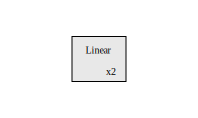

In [ ]:
hl.build_graph(model, torch.zeros([10, inp]))

#### optimizer object will hold the current state and will update the parameters based on the computed gradients.
optim.Adam Implements Adam algorithm.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

#### Training our model

Foward Pass:
* Predicting Y with input data X

Finding Loss:
* Finding difference between Y_train_tensor(target) and output using MSEloss function defined above


Back Propagation:
* starting with zero gradients before back propogation
* back propogation is done by simply loss.backward() function

optimizer step
* All optimizers implement a step() method, that updates the parameters.
* reducing weight with multiple of learning rate and gradient

In [ ]:
total_step = len(train_loader)

num_epochs = 10000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if epoch % 2000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10000], Step [1/6], Loss: 30393796.0000
Epoch [1/10000], Step [2/6], Loss: 26252570.0000
Epoch [1/10000], Step [3/6], Loss: 27779926.0000
Epoch [1/10000], Step [4/6], Loss: 24756412.0000
Epoch [1/10000], Step [5/6], Loss: 23729744.0000
Epoch [1/10000], Step [6/6], Loss: 28965676.0000
Epoch [2001/10000], Step [1/6], Loss: 456992.4062
Epoch [2001/10000], Step [2/6], Loss: 395402.2188
Epoch [2001/10000], Step [3/6], Loss: 458430.3438
Epoch [2001/10000], Step [4/6], Loss: 261646.4531
Epoch [2001/10000], Step [5/6], Loss: 302462.2500
Epoch [2001/10000], Step [6/6], Loss: 451776.2188
Epoch [4001/10000], Step [1/6], Loss: 328014.2500
Epoch [4001/10000], Step [2/6], Loss: 347679.6875
Epoch [4001/10000], Step [3/6], Loss: 380527.9688
Epoch [4001/10000], Step [4/6], Loss: 380827.8125
Epoch [4001/10000], Step [5/6], Loss: 294759.3125
Epoch [4001/10000], Step [6/6], Loss: 304470.0625
Epoch [6001/10000], Step [1/6], Loss: 349052.6562
Epoch [6001/10000], Step [2/6], Loss: 258883.4844
Epoch 

#### Using our model for predictions
We pick one of the days from the test data set for predictions

- model.eval() will notify all your layers that you are in eval mode, that way, batchnorm or dropout layers will work in eval model instead of training mode.

In [ ]:
model.eval()

with torch.no_grad():
    y_pred = model(x_test_tensor)

In [ ]:
sample = x_test.iloc[45]
sample

registered       2874.000000
holiday             0.000000
weekday             0.000000
weathersit          1.000000
temp                0.279167
atemp               0.268308
season_fall         0.000000
season_spring       1.000000
season_summer       0.000000
season_winter       0.000000
Name: 421, dtype: float64

#### We convert these features to a Pytorch tensor

In [ ]:
sample_tensor = torch.tensor(sample.values, 
                             dtype = torch.float)
sample_tensor

tensor([2.8740e+03, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.7917e-01, 2.6831e-01,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00])

#### Compare the actual and predicted values for this particular data point
The predicted count is quite close to the actual one

In [ ]:
with torch.no_grad():
    y_pred = model(sample_tensor)

print("Predicted count : ", (y_pred.item()))
print("Actual count : ", (y_test.iloc[45]))

Predicted count :  3179.6962890625
Actual count :  cnt    3389
Name: 421, dtype: int64


#### Performing predictions on the entire test set
We get the list of predicted values in a tensor

In [ ]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

#### The tensor is converted to a numpy array

In [ ]:
y_pred = y_pred_tensor.detach().numpy()

y_pred.shape

(147, 1)

In [ ]:
y_test.values.shape

(147, 1)

In [ ]:
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})

compare_df.sample(10)

,actual,predicted
110,1248,1210.096069
88,4304,4389.856934
51,7359,7377.675293
74,8120,6707.283691
80,5918,6263.949707
61,4844,5285.495605
53,1891,1892.552124
70,4548,5091.002441
63,959,1007.345276
34,4040,4425.174316


#### r2 score of the test data is pretty high

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9256336201876738

#### Plot a graph of the predicted count against the actual count


it is forming a  linear relationship


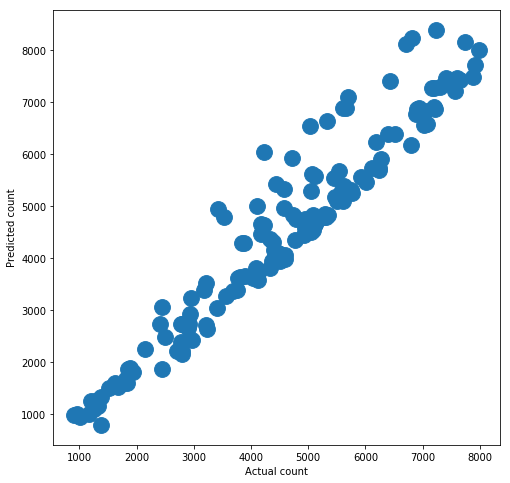

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(y_pred, y_test.values, s=250)

plt.xlabel("Actual count")
plt.ylabel("Predicted count")

plt.show()

#### Saving our trained model
Pytorch allows our model to be saved. The parameters to the torch.save() method are the model to be saved followed by the directory path where it should be saved

In [ ]:
torch.save(model, 'my_model')

In [ ]:
!ls 

Demo_sheet.xlsx
Pytorch In linux
Pytorch In linux-20190417T050912Z-001.zip
commands.txt
datasets
demo10-RegressionUsingFullyConnectedNN.ipynb
demo11-ClassificationUsingACustomNNModel.ipynb
demo7-SimpleRegressionUsingWeightsBiasesAndAutograd.ipynb
demo8-RidgeRegression.ipynb
demo9-RegressionUsingNNLayersAndOptimizers.ipynb
my_model


#### Loading  an already saved model
We can load a saved model using the torch.load() method

In [ ]:
saved_model = torch.load('my_model')

#### We now use the saved model to perform predictions
It is now used exactly how we used the model before it was saved

In [ ]:
y_pred_tensor = saved_model(x_test_tensor)

In [ ]:
y_pred = y_pred_tensor.detach().numpy()

#### we plot the actual and predicted values
We see that actual and predicted count are quite close

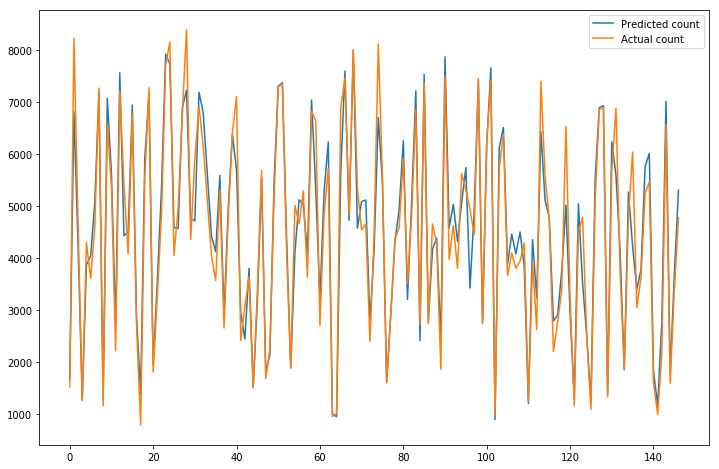

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(y_pred, label='Predicted count')
plt.plot(y_test.values, label='Actual count')

plt.legend()
plt.show()